<a href="https://colab.research.google.com/github/MaCoZu/NLP/blob/main/03_gensim.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Using Gensim to create word embeddings.

## Dr. Tristan Behrens.

In this notebook we will use Gensim to create word embeddings from a corpus.

Word embedding are just fantastic. In a nutshell, they map words to vectors. And with vectors, as we all know, you can do math.

- [Wikipedia: Word Embedding](https://en.wikipedia.org/wiki/Word_embedding).

---

Firstly, we download the corpus. We download the entire Harry Potter collection. Feel free, to use your own corpus.

In [1]:
# !wget -nc "https://raw.githubusercontent.com/formcept/whiteboard/master/nbviewer/notebooks/data/harrypotter/Book%201%20-%20The%20Philosopher's%20Stone.txt"
# !wget -nc "https://raw.githubusercontent.com/formcept/whiteboard/master/nbviewer/notebooks/data/harrypotter/Book%202%20-%20The%20Chamber%20of%20Secrets.txt"
# !wget -nc "https://raw.githubusercontent.com/formcept/whiteboard/master/nbviewer/notebooks/data/harrypotter/Book%203%20-%20The%20Prisoner%20of%20Azkaban.txt"
# !wget -nc "https://raw.githubusercontent.com/formcept/whiteboard/master/nbviewer/notebooks/data/harrypotter/Book%204%20-%20The%20Goblet%20of%20Fire.txt"
# !wget -nc "https://raw.githubusercontent.com/formcept/whiteboard/master/nbviewer/notebooks/data/harrypotter/Book%205%20-%20The%20Order%20of%20the%20Phoenix.txt"
# !wget -nc "https://raw.githubusercontent.com/formcept/whiteboard/master/nbviewer/notebooks/data/harrypotter/Book%206%20-%20The%20Half%20Blood%20Prince.txt"
# !wget -nc "https://raw.githubusercontent.com/formcept/whiteboard/master/nbviewer/notebooks/data/harrypotter/Book%207%20-%20The%20Deathly%20Hallows.txt"

--2023-08-09 08:35:06--  https://raw.githubusercontent.com/formcept/whiteboard/master/nbviewer/notebooks/data/harrypotter/Book%201%20-%20The%20Philosopher's%20Stone.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 492161 (481K) [text/plain]
Saving to: ‘Book 1 - The Philosopher's Stone.txt’

Book 1 - The Philos 100%[===================>] 480.63K  --.-KB/s    in 0.04s   

2023-08-09 08:35:06 (10.8 MB/s) - ‘Book 1 - The Philosopher's Stone.txt’ saved [492161/492161]

--2023-08-09 08:35:07--  https://raw.githubusercontent.com/formcept/whiteboard/master/nbviewer/notebooks/data/harrypotter/Book%202%20-%20The%20Chamber%20of%20Secrets.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Conn

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
%cd /content/drive/MyDrive/data/hplovecraftcompleteworks

/content/drive/MyDrive/data/hplovecraftcompleteworks


In [4]:
!ls

 Dee-Necronomicon_djvu.txt
 HP-Lovecraft-Complete-Works-Vol-I_djvu.txt
 HP-Lovecraft-Complete-Works-Vol-II_djvu.txt
 HP-Lovecraft-Complete-Works-Vol-III_djvu.txt
 HP-Lovecraft-Complete-Works-Vol-IV_djvu.txt
'John Dee - Necronomicon_djvu.txt'
 the_necronomicon_spell_book_djvu.txt


## Import all necessary modules.

In [5]:
import os
import logging
import os
import multiprocessing
from gensim.models import Word2Vec
from gensim.utils import simple_preprocess
from nltk.tokenize import sent_tokenize
import nltk
nltk.download('punkt')
import numpy as np
import seaborn as sns
from scipy import spatial
import matplotlib.pyplot as plt

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


## Train Gensim.

Here we feed all the text data into Gensim to train Word2Vec.

- [Gensim homepage](https://radimrehurek.com/gensim/).
- [Wikipedia: Word2Vec](https://en.wikipedia.org/wiki/Word2vec).

In [6]:
from gensim.test.utils import datapath
from gensim import utils

class MyCorpus:
    """An iterator that yields sentences (lists of str)."""

    def __init__(self):
        self.lines = []

        files = os.listdir(".")
        files = [file for file in files if file.endswith(".txt")]
        print(f"Found {len(files)} files")

        for file in files:
            for line in open(file):
                self.lines += [line]
        print(f"Got {len(self.lines)} lines.")

    def __iter__(self):
        for line in self.lines:
            preprocessed_line = utils.simple_preprocess(line)
            yield preprocessed_line

In [7]:
import gensim.models

sentences = MyCorpus()

model = gensim.models.Word2Vec(
    sentences=sentences,
    sg=1,
    vector_size=400,
    window=20,
    min_count=3,
    epochs=15,
    workers=multiprocessing.cpu_count()
)

print("Done.")

Found 7 files
Got 88790 lines.
Done.


## Find most similar words.

With vectors it is easy to find the nearest neighbours.

Note: Feel free to experiment with your own words.

In [8]:
model.wv.most_similar("oukranikov", topn=20)

[('vasili', 0.8913617730140686),
 ('injured', 0.7282428741455078),
 ('unlucky', 0.7262771129608154),
 ('swart', 0.7192484736442566),
 ('stranded', 0.7178663611412048),
 ('singin', 0.7076650261878967),
 ('furiously', 0.7042656540870667),
 ('discredit', 0.7019041180610657),
 ('jokers', 0.7000476717948914),
 ('camped', 0.6977071166038513),
 ('calf', 0.6959617733955383),
 ('keeled', 0.6931392550468445),
 ('scared', 0.6927520036697388),
 ('puppy', 0.6920648813247681),
 ('kills', 0.6895772218704224),
 ('listenin', 0.6893505454063416),
 ('thirtieth', 0.6872752904891968),
 ('implored', 0.6865955591201782),
 ('booted', 0.6857376098632812),
 ('distressing', 0.6840384006500244)]

## Plot word similarities.

That was just one word. Let us generate a similarity matrix of a lot of words. Again, use your own.

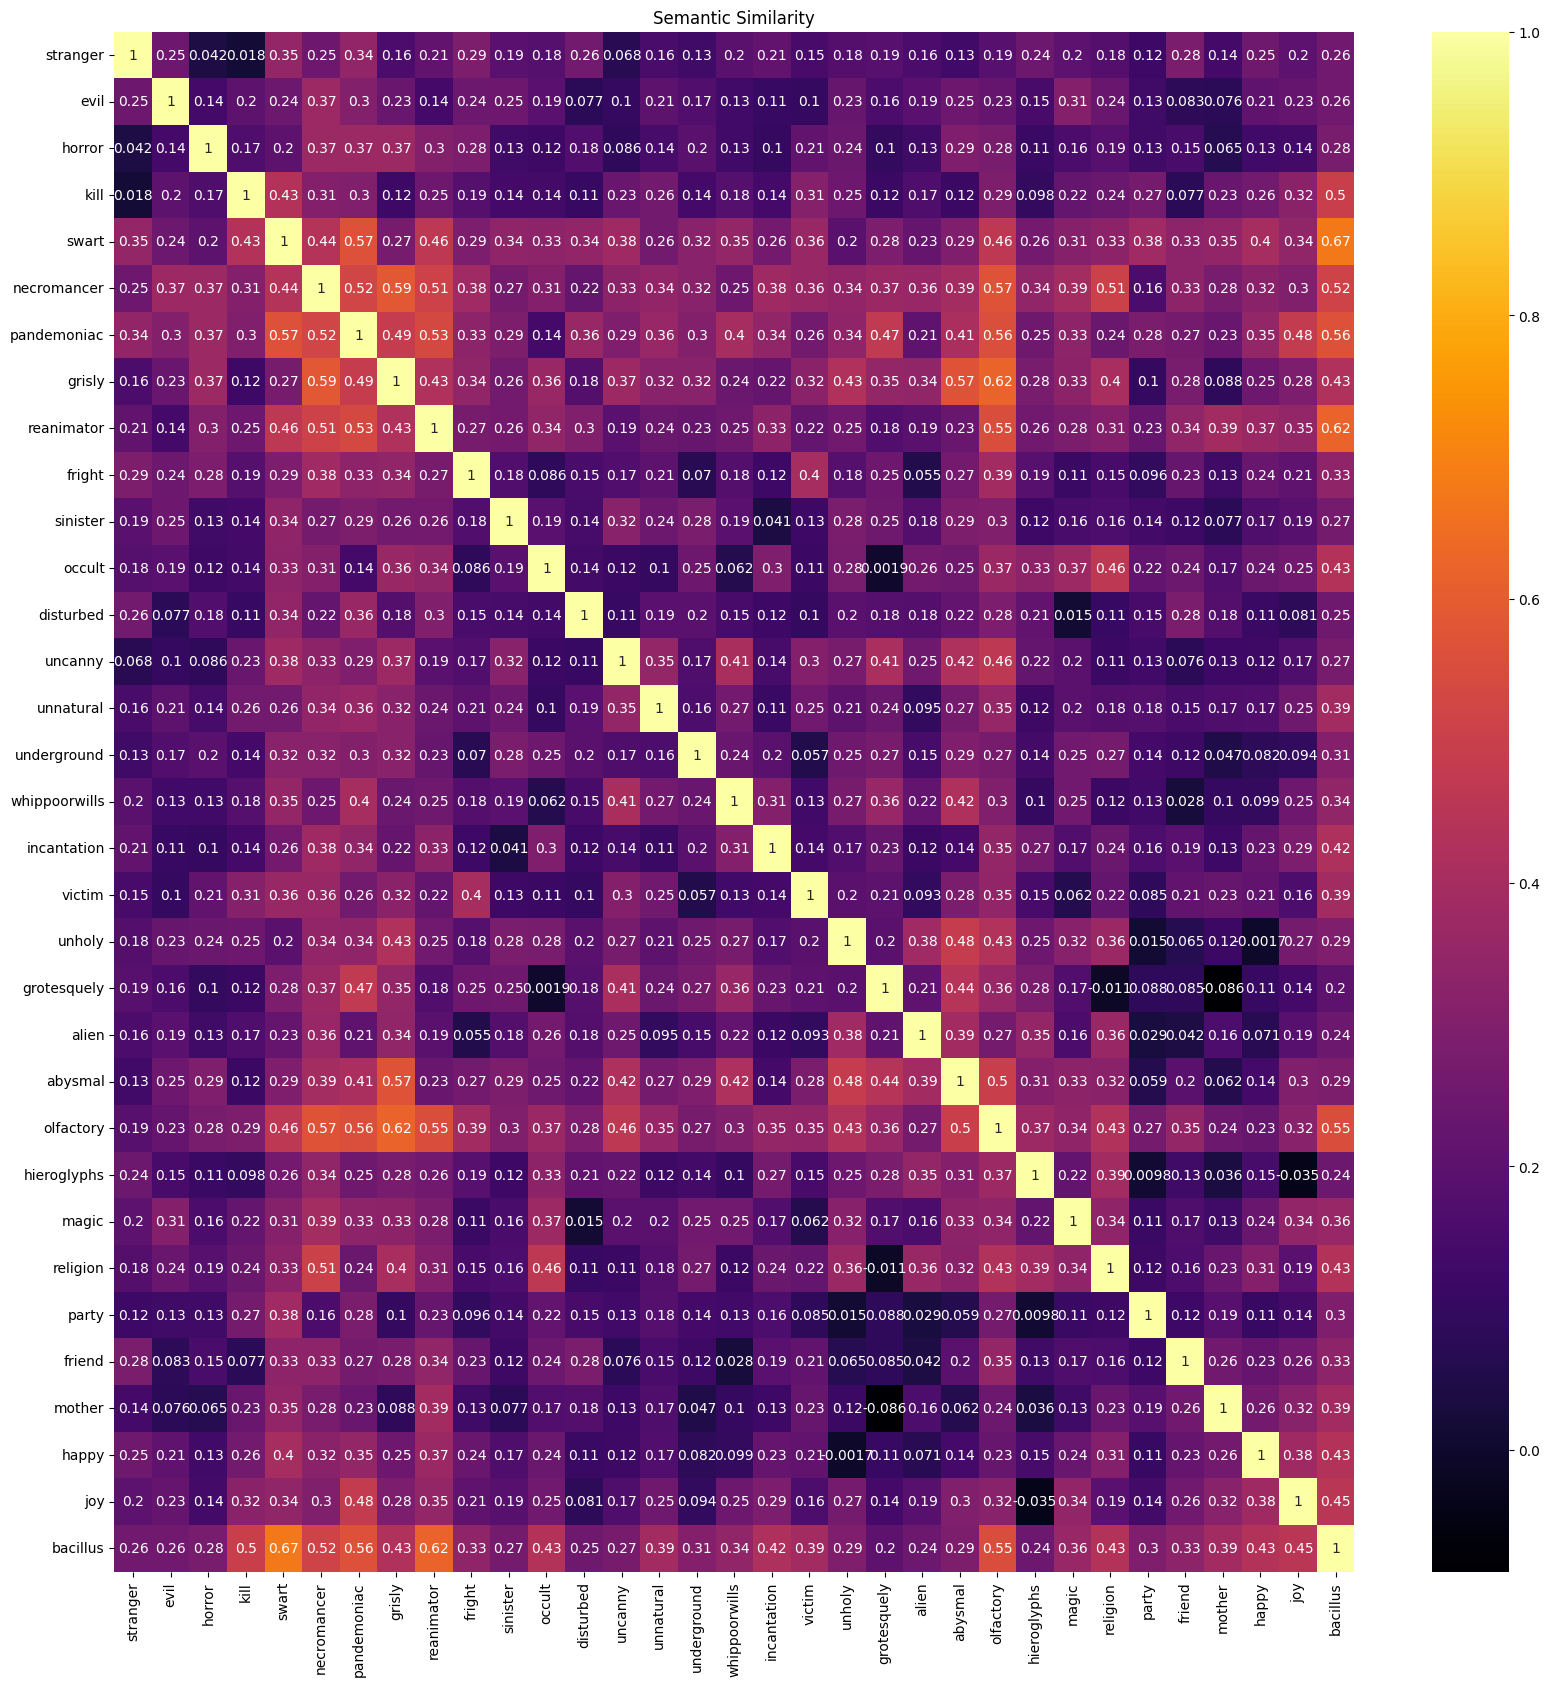

In [10]:
def plot_similarities(words):
    features = [np.array(model.wv[word]) for word in words]

    similarities = np.zeros((len(features), len(features)))
    for index1, feature1 in enumerate(features):
        for index2, feature2 in enumerate(features):
            similarities[index1, index2] = 1 - spatial.distance.cosine(feature1, feature2)

    fig, ax = plt.subplots(figsize=(20, 20))
    g = sns.heatmap(
        similarities,
        annot=True,
        xticklabels=words,
        yticklabels=words,
        cmap="inferno"
    )
    g.set_xticklabels(words, rotation=90)
    g.set_yticklabels(words, rotation=0)
    g.set_title("Semantic Similarity")

words = [
    "stranger",
    "evil",
    "horror",
    "kill",
    "swart",
    "necromancer",
    "pandemoniac",
    "grisly",
    "reanimator",
    "fright",
    "sinister",
    "occult",
    "disturbed",
    "uncanny",
    "unnatural",
    "underground",
    "whippoorwills",
    "incantation",
    "victim",
    "unholy",
    "grotesquely",
    "alien",
    "abysmal",
    "olfactory",
    "hieroglyphs",
    "magic",
    "religion",
    "party",
    "friend",
    "mother",
    "happy",
    "joy",
    "bacillus",





    # "democracy",
    # "semihuman",
    # "talisman ",
    #"psychopomps",
    #"promiscuously",
    ]



plot_similarities(words)

# Thank you!